### 1. Introduction
This notebook contains solutions to all three parts of the [Riddler Classic puzzle from FiveThirtyEight](https://fivethirtyeight.com/features/how-quickly-can-you-throw-the-perfect-game-of-darts/) for the week of 12/91/7.

### 2. Maximum Score

To get the maximum number of points, the individual darts should be as close together to each other as possible. If we think of each dart as creating a "forbidden circle" of radius 1 ft. around it, this means maximizing the overlap of the forbidden areas, and thus minimizing the total forbidden area, allowing for more new darts. The minimum possible distance between two darts is 1 ft. We should start by placing a dart at the center, so there is as much area as possible for theo thers. After doing this, the best we can do is place 6 more darts at the vertices of a regular hexagon, giving 7 darts all 1 ft. away from each other. So the maximum possible score is $\boxed{7}$. An image of the optimal configuration is shown below, with the board in black, the positions of the darts in red, and the boundaries of the "forbidden regions" in dashed red. 

<img src=files"min_config.png" width=250px>



### 3. Probability of Making It Past One

Now we compute the probability that the game goes past the first dart. To do this, we condition on the location of the first dart, compute the probabibility when this location is fixed, then integrate over all possible positions. We only need to consider the distance between the first dart and the center of the board, since rotating the position of the dart will not change the area. For convenience, we work in polar coordinates. 

#### 3.1 Writing An Expression

If the first dart lands a distance of $r$ away from the center of the board, then the area of the intersection between the circle of radius 1 centered at that dart and the board will be $$2\cos^{-1}\left(\frac{r}{2}\right)-\frac{r}{2}\sqrt{4-r^2},$$ according to (14) [here](http://mathworld.wolfram.com/Circle-CircleIntersection.html). Then, the probability that the second dart lands outside this region will be the area outside this region divided by the area of the board, or $$\frac{\pi-2\cos^{-1}\left(\frac{r}{2}\right)+\frac{r}{2}\sqrt{4-r^2}}{\pi}=1-\frac{2}{\pi}\cos^{-1}\left(\frac{r}{2}\right)+\frac{r}{2\pi}\sqrt{4-r^2}.$$ 

Then, the probability of this happening is $$\int_0^{2\pi} \int_0^1 \frac{1}{\pi}\left(1-\frac{2}{\pi}\cos^{-1}\left(\frac{r}{2}\right)+\frac{r}{2\pi}\sqrt{4-r^2}\right) r\,dr\,d\theta.$$ The integrand is constant in $\theta$, so this becomes $$\int_0^1 2r\left(1-\frac{2}{\pi}\cos^{-1}\left(\frac{r}{2}\right)+\frac{r}{2\pi}\sqrt{4-r^2}\right)\, dr,$$ which splits up into $$\int_0^1 2r\,dr -\frac{4}{\pi}\int_0^1r\cos^{-1}\left(\frac{r}{2}\right)\,dr+\frac{1}{\pi}\int_0^1r^2\sqrt{4-r^2}\,dr.$$ 

The first integral is just $1$. The other two are more involved.

#### 3.2 The Second Piece
The second can be scaled to get $$\int_0^1 r\cos^{-1}\left(\frac{r}{2}\right)\, dr=4\int_0^{1/2} r\cos^{-1}(r)\,dr.$$ Now we integrate by parts with $u=\cos^{-1}(r), dv=r$, so $du=-1/(\sqrt{1-r^2}), v=r^2/2,$ and it becomes $$4\left[\frac{r^2}{2}\cos^{-1}(r)\right]_0^{1/2}+2\int_0^{1/2}\frac{r^2}{\sqrt{1-r^2}}\,dr=\frac{\pi}{6}+2\int_0^{1/2}\frac{r^2}{\sqrt{1-r^2}}\,dr.$$ For that new integral, we substitute $r=\sin\theta$, so $dr=\cos\theta\,d\theta$ and $$2\int_0^{1/2} \frac{r^2}{\sqrt{1-r^2}}\,dr=2\int_0^{\pi/6}\sin^2\theta\,d\theta.$$ Now we use a double angle formula to reduce this to $$\int_0^{\pi/6} 1-\cos2\theta\,d\theta=\left[\theta-\frac{1}{2}\sin2\theta\right]_0^{\pi/6}=\frac{\pi}{6}-\frac{\sqrt{3}}{4}.$$ Thus, the value of the original integral was just $\frac{\pi}{3}-\frac{\sqrt{3}}{4}$ 




#### 3.3 The Third Piece
For the third, we substitute $r=2\sin \theta, dr=2\cos \theta\, d\theta$ to obtain $$\int_0^1 r^2\sqrt{4-r^2}\,=\int_0^{\pi/6} 4\sin^2\theta\cdot 2\cos \theta\cdot \sqrt{4-4\sin^2\theta}\, d\theta.$$ Collecting terms gives $$16\int_0^{\pi/6} \sin^2\theta \cos^2\theta=4\int_0^{\pi/6}\sin^2{2\theta}\, d\theta.$$ Using a double angle formula reduces this to $$2\int_0^{\pi/6} 1-\cos4\theta\,d\theta=2\left[\theta-\frac{1}{4}\sin4\theta\right]_0^{\pi/6}=\frac{\pi}{3}-\frac{\sqrt{3}}{4}.$$ 

#### 3.4 Putting It Together
Plugging all this back in, the desired probability is $$1-\frac{4}{\pi}\left(\frac{\pi}{3}-\frac{\sqrt{3}}{4}\right)+\frac{1}{\pi}\cdot\left(\frac{\pi}{3}-\frac{\sqrt{3}}{4}\right)=\boxed{\frac{3\sqrt{3}}{4\pi}}\approx 0.4135.$$ 


### 4. Expected Score

To compute the expected score, we will need some numerical simulations. We introduce two functions that simulate a single dart throw (using rejection sampling) and simulate a full game. We then call the second function many times to create a large set of results of simulated games.

In [19]:
import numpy as np
N = 100000

def dist(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    
def throw_dart():
    x,y = np.random.uniform(), np.random.uniform()
    x,y = 2*x-1, 2*y-1
    if x**2+y**2<=1:
        return (x,y)
    else:
        return throw_dart()

def simulate_game():
    cont = True 
    count = 0 
    darts = []     
    while cont:
        new = throw_dart() 
        dists = map(lambda x : dist(x,new), darts)
        if np.all(map(lambda x : x>=1, dists)):
            darts.append(new) 
            count+=1
        else:
            cont = False 
    return count

results = [simulate_game() for j in range(N)]

With these results, we can estimate the expected score of a game and also look at the distribution of scores. As a sanity check, we also estimate the probability of going past the first throw to see if it agrees with our calculation from the previous section.

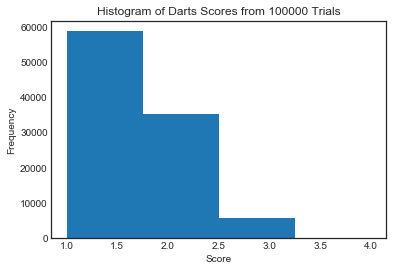

Probability of going past first throw: 0.413
Expected score: 1.474


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

prob = len(filter(lambda x : x>1, results))/float(N)
expectation = np.mean(results)

plt.hist(results, bins=4)
plt.title("Histogram of Darts Scores from %.0f Trials" % N)
plt.ylabel("Frequency")
plt.xlabel("Score")

plt.show()

print "Probability of going past first throw: %.3f" % prob
print "Expected score: %.3f" % expectation


The probabilities agree, so our code is correct, and the expectation is approximately $\boxed{1.473}$. Note that although its hard to see in the histogram, the game does occasionaly make it past 3: in 132 of the simulations, it got to 4, but never to 5.